## Universidad de Buenos Aires
## Deep Learning - Examen
## Abril 2023
### Alumno: Gonzalo Gontad



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Ejercicio 1

Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 1)^2 - (y - 5)^2 + 3$


#### (a) Aplicar gradiente e igualar a zero de **forma analítica** para encontrar los valores de $x$ e $y$ donde $z$ tiene un máximo. Cuál es el valor del máximo?

Calculo el gradiente en forma analitica relizando las derivadas parciales de la funcion respecto a x e y, igualando a cero y resolviendo el sistema de ecuaciones.

$$
\begin{align}
\frac{\partial z}{\partial x} = -2(x-1) = 0  \to  x = 1\\
\frac{\partial z}{\partial y} = -2(y-5) = 0  \to  y = 5\\
\end{align}
$$


Calculo el valor de z para el punto (1,5)

$$
\begin{align}
z = -(1 - 1)^2 - (5 - 5)^2 + 3 = 3
\end{align}
$$

#grafico de la funcion

In [2]:
def z(x, y):
    return -(x-1)**2 - (y-5)**2 + 3

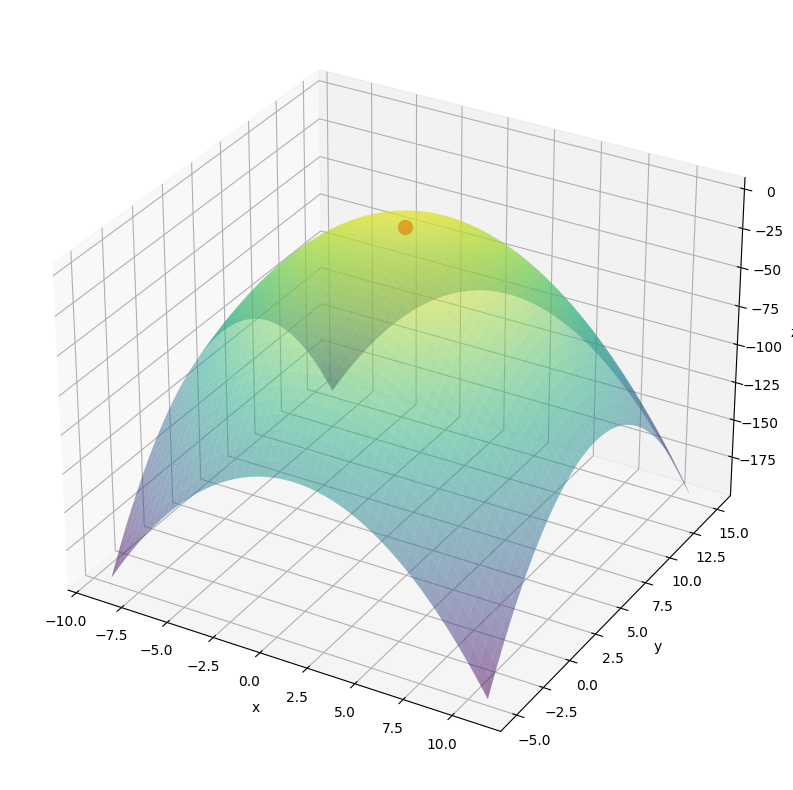

In [3]:


max_location = np.array([1, 5])
max_value = 3

x = np.linspace(-9, 11, 100)
y = np.linspace(-5, 15, 100)

X, Y = np.meshgrid(x, y)
Z = z(X, Y)
fig = plt.figure(figsize=(10, 10))
#Marco el punto máximo

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#Marco el punto máximo

ax.plot([max_location[0]], [max_location[1]], [max_value], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)



plt.show()


#### (b) **Implementar un algoritmo de** SGD para encontrar la ubicación del máximo de manera numérica.

In [4]:
def sdg(x, y, lr, epochs):
    ''' 
    Funcion que implementa el descenso del gradiente
    Parametros:
    x: coordenada x inicial
    y: coordenada y inicial
    lr: learning rate
    epochs: número de iteraciones

    Retorna:
    x_path,y_path, z_path: listas de coordenadas x, y, z en cada iteración
    '''
    #Listas para guardar las coodenadas del camino del descenso del gradiente
    x_path = []
    y_path = []
    z_path = []

    x_path.append(x)
    y_path.append(y)
    z_path.append(z(x, y))

    for i in range(epochs):
        x = x - lr * 2 * (x - 1)
        y = y - lr * 2 * (y - 5)

        x_path.append(x)
        y_path.append(y)
        z_path.append(z(x, y))

    return x_path, y_path, z_path

In [5]:
sdg_search = sdg(10, -5, 0.1, 35)
for step_num, step in enumerate(sdg_search[2]):
    print ('Step {}: x={:.2f}, y={:.2f} z={:.2f}'.format(step_num, sdg_search[0][step_num], sdg_search[1][step_num], step))
    

Step 0: x=10.00, y=-5.00 z=-178.00
Step 1: x=8.20, y=-3.00 z=-112.84
Step 2: x=6.76, y=-1.40 z=-71.14
Step 3: x=5.61, y=-0.12 z=-44.45
Step 4: x=4.69, y=0.90 z=-27.37
Step 5: x=3.95, y=1.72 z=-16.43
Step 6: x=3.36, y=2.38 z=-9.44
Step 7: x=2.89, y=2.90 z=-4.96
Step 8: x=2.51, y=3.32 z=-2.09
Step 9: x=2.21, y=3.66 z=-0.26
Step 10: x=1.97, y=3.93 z=0.91
Step 11: x=1.77, y=4.14 z=1.66
Step 12: x=1.62, y=4.31 z=2.15
Step 13: x=1.49, y=4.45 z=2.45
Step 14: x=1.40, y=4.56 z=2.65
Step 15: x=1.32, y=4.65 z=2.78
Step 16: x=1.25, y=4.72 z=2.86
Step 17: x=1.20, y=4.77 z=2.91
Step 18: x=1.16, y=4.82 z=2.94
Step 19: x=1.13, y=4.86 z=2.96
Step 20: x=1.10, y=4.88 z=2.98
Step 21: x=1.08, y=4.91 z=2.98
Step 22: x=1.07, y=4.93 z=2.99
Step 23: x=1.05, y=4.94 z=2.99
Step 24: x=1.04, y=4.95 z=3.00
Step 25: x=1.03, y=4.96 z=3.00
Step 26: x=1.03, y=4.97 z=3.00
Step 27: x=1.02, y=4.98 z=3.00
Step 28: x=1.02, y=4.98 z=3.00
Step 29: x=1.01, y=4.98 z=3.00
Step 30: x=1.01, y=4.99 z=3.00
Step 31: x=1.01, y=4.99 z=

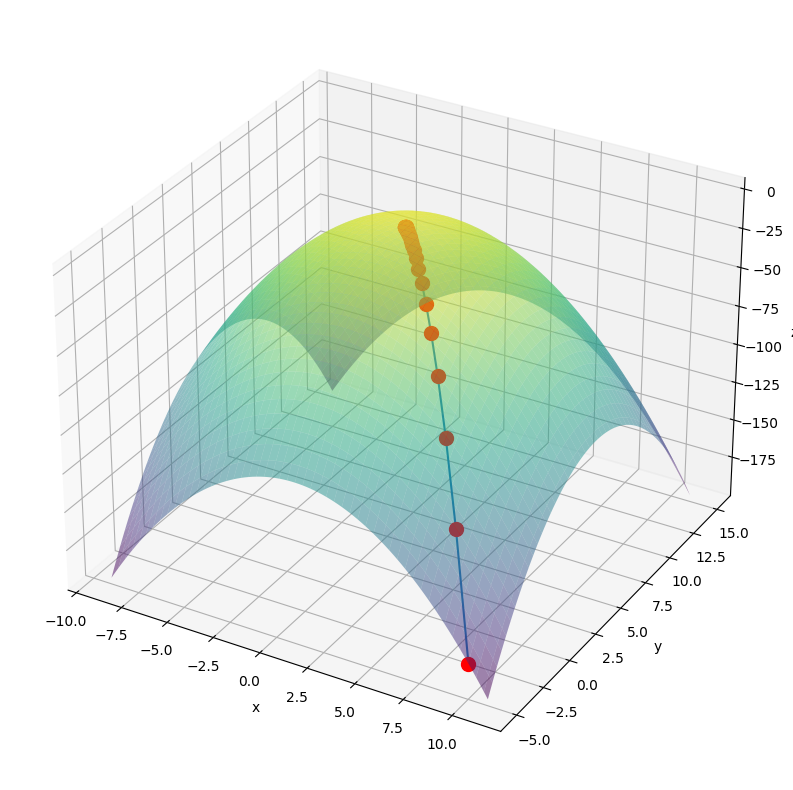

In [6]:
#dibujo la trayectoria
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sdg_search[0], sdg_search[1], sdg_search[2], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Ejercicio 2

En las siguientes imágenes, se presenta la traslación de un objeto en la capa de entrada de una CNN (el 2 de las imágenes inferiores) y las neuronas que se activan a la salida de dicha CNN para 2 tipos de propiedadedes de las CNN: *Invarianza al desplazamiento (translational invariance)* y *equivariancia al desplazamiento (translational equivariance)*.



![a](https://docs.google.com/uc?id=1buWr91SCZcx4Zx55VLpAf1mCxqVgHgci)

Imagen 1 link (https://drive.google.com/file/d/1buWr91SCZcx4Zx55VLpAf1mCxqVgHgci/view?usp=sharing)



![b](https://docs.google.com/uc?id=1FqUKjutcRL-1Vay0HYY-1tXlISCZFH02)

Imagen 2 link (https://drive.google.com/file/d/1FqUKjutcRL-1Vay0HYY-1tXlISCZFH02/view?usp=sharing)

#### a) ¿Qué imagen se corresponde con cuál propiedad? 

La imagen a) c corresponde a la propiedad de equivariancia a la traslacion, ya que la representacion a la salida de la capa se traslada en la misma direccion que la imagen de entrada.

![a](https://docs.google.com/uc?id=1buWr91SCZcx4Zx55VLpAf1mCxqVgHgci)

La imagen b) c corresponde a la propiedad de invariancia a la traslacion, ya que la representacion a la salida de la capa no se mueve con las traslaciones en la imagen de entrada.

![b](https://docs.google.com/uc?id=1FqUKjutcRL-1Vay0HYY-1tXlISCZFH02)

#### b) ¿Cuál/cuáles de cada capa elemental de una CNN (convolución - activación - pooling) aporta cada propiedad?

La capa de convolución aporta la propiedad de equivariancia al desplazamiento, ya que la convolución se aplica desplazando el kernel sobre todas las posiciones de la imagen de entrada. El resultado es la obtencion de caracteristicas en cada poscion de la imagen sobre la que se aplico la convolucion.

<img src="Images/Convolution-layer-is-translation-equivariant-a-but-convolution-is-not-rotation.png">

Ref: Li, Xiaomeng & Yu, Lequan & Fu, Chi-Wing & Heng, Pheng-Ann. (2018). Deeply Supervised Rotation Equivariant Network for Lesion Segmentation in Dermoscopy Images. 


La capa de pooling es la que aporta la propiedad de invariacion al desplazamiento, debido a que aplica una funcion a toda una region de la imagen condensando informacion de ella (reduccion de dimensionalidad) y ante moderados desplazamientos de la imagen de entrada tiene pequeños o nulos desplazamientos en la salida. Es decir que la invaricion al desplazamiento va a depender de la magnitud desplazamiento de la imagen de entrada en relacion con el tamaño de la region de pooling.

En cuanto a las capas de activacion, no aportan ninguna de las dos propiedades. Solo proveen una no linealidad a la salida de la capa de convolucion.

## Ejercicio 3

Para la siguiente red neuronal recurrente, se pide **hallar el tamaño de la salida, de los estados ocultos y nombre y tamaño del total de parámetros entrenables**, si el vector de entrada son 5 muestras secuenciadas de una señal univariada $x(t)$.

![c](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)

Imagen 3 link (https://drive.google.com/file/d/1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL/view?usp=sharing)



Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$ 
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$ 

La imagen y las ecuaciones describen una red neuronal con:
* Una capa de neuronas recurrentes de dos estados ocultos. La dimension de salida de esta capa es 2x5 (una salida por estado oculto en cada muestra) y sus parametros son:
    - w_xh1 y w_xh2: pesos de la entrada a la capa de neuronas recurrentes. [1 x Cant de estados ocultos = 2 parametros]
    - w_h1h1 y w_h2h2: pesos de la capa de neuronas recurrentes a si misma afectando al estado anterior [1 x Cant de estados ocultos = 2 parametros]
    - w_h1h2 y w_h2h1: pesos de la capa de neuronas recurrentes entre neuronas de la misma capa afectando al estado anterior [(Cant de estados ocultos-1) * Cant de estados ocultos = 2 parametros]
    - bh1 y bh2: bias de la capa de neuronas recurrentes [1 x Cant de estados ocultos = 2 parametros]
* Una capa de salida y(t) con una neurona. La dimension de la salida es 1x5 (Cant de neuronas de salida x Longitud del vector de entrada) y sus parametros son:
    - w_h1y y w_h2y: pesos de la capa de neuronas recurrentes a la capa de salida [Cant de neuronas de salida x Cant de estados ocultos = 2 parametros]
    - by: bias de la capa de salida [1 x Cant de neuronas de salida = 1 parametro]


Si el vector de entrada son 5 muestras secuenciadas de una señal univariada x(t), la salida de la red es un vector de 5 muestras secuenciadas de la señal y(t). La dimension de la salida es 5x1.

### Implementacion simple para chequear parametros

In [7]:
# Librerias
import numpy as np
import torch


In [8]:
# Estas funciones para mostrar los parámetros del modelo y la salida de la red
# se copiaron del notebook de la clase 6 y se modificaron para el problema en cuestión
def imp_param(model):
  print('-'*84)
  print('PARAMETROS DEL MODELO')
  print('-'*84)
  for name, param in model.named_parameters():
    if param.requires_grad: 
      print('Nombre del parámetro: ')
      print(name)
      print('Tamaño del parámetro: ')
      print(param.data.shape)
      print()

def teoria(model, largo_entrada = 3, batch_size=1):
  print('-'*84)
  print('MODELO')
  print('-'*84)
  print(model)
  imp_param(model)

  # Generamos una entrada aleatoria para ver como responde la red
  # el tamaño de la entrada esa acorde a los tamaños que cargamos antes
  entrada = torch.rand(batch_size, largo_entrada, input_size)
  print('-'*84)
  print('ENTRADA')
  print('-'*84)
  print('entrada shape: ', entrada.shape)
  print(entrada)

  # le agrego la dimension del batch:
  #entrada = entrada[None, :]
  print()
  print('entrada con nuevas dimensiones [batch, Length, nr_features] ')
  print(entrada.shape)

  # Pasamos la entrada a la red
  o = model(entrada)
  print('-'*84)
  print('SALIDA')
  print('-'*84)
  print('salida de la red (output) (largo igual al input): ', o.shape)
  print(o)





In [9]:
class RNN_TP(torch.nn.Module):
  def __init__(self, input_size=1, hidden_size=2, num_layers=1, out_fc=1):
    super().__init__()
    self.rnn1 = torch.nn.RNN(input_size, hidden_size, num_layers, batch_first=True, )
    self.fc = torch.nn.Linear(hidden_size, out_fc )
  
  def forward(self, x):
    x, h = self.rnn1(x)
    o_fc = self.fc(x) 
    return o_fc


In [10]:
input_size= 1
hidden_size= 2 # 2 hidden de la capa RNN
num_layers= 1 # numero de layers en cada capa RNN
out_fc = 1 # número de salidas de la fc
largo_entrada = 5

modelo_tp = RNN_TP(input_size, hidden_size, num_layers, out_fc)
teoria(modelo_tp, largo_entrada)

------------------------------------------------------------------------------------
MODELO
------------------------------------------------------------------------------------
RNN_TP(
  (rnn1): RNN(1, 2, batch_first=True)
  (fc): Linear(in_features=2, out_features=1, bias=True)
)
------------------------------------------------------------------------------------
PARAMETROS DEL MODELO
------------------------------------------------------------------------------------
Nombre del parámetro: 
rnn1.weight_ih_l0
Tamaño del parámetro: 
torch.Size([2, 1])

Nombre del parámetro: 
rnn1.weight_hh_l0
Tamaño del parámetro: 
torch.Size([2, 2])

Nombre del parámetro: 
rnn1.bias_ih_l0
Tamaño del parámetro: 
torch.Size([2])

Nombre del parámetro: 
rnn1.bias_hh_l0
Tamaño del parámetro: 
torch.Size([2])

Nombre del parámetro: 
fc.weight
Tamaño del parámetro: 
torch.Size([1, 2])

Nombre del parámetro: 
fc.bias
Tamaño del parámetro: 
torch.Size([1])

-----------------------------------------------------

#### Esta implementacion de la red se realizo unicamente para verificar la cantidad de parametros entrenables. No pretende ser una representacion exacta de la red propuesta, por lo que se deben hacer las siguientes aclaraciones:

- Los parametros rnn1.bias_hh_l0 y rnn1.bias_ih_l0 y se pueden agrupar en un solo vector de 2 elementos. De este modo quedarian 11 parametros entrenables en total.
- La capa recurrente incluye una capa de activacion por defecto que el modelo propuesto no tiene.


## Ejercicio 4 

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.**
- b)	Entrenar **un solo modelo** de deep learning que utilice embeddings tanto para los productos como para los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Compare el score de cada modelo y comente lo necesario.

In [11]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

## EDA

In [12]:
#Leo el dataset
df = pd.read_csv('dataset_black_sales.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df.describe( include = 'all' )

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [14]:
users=df['User_ID'].unique().shape[0]
products=df['Product_ID'].unique().shape[0]
print (f'Cant de usuarios: {users}')
print (f'Cant de productos: {products}')



Cant de usuarios: 5891
Cant de productos: 3631


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Las columnas Product_Category_2 y Product_Category_3 tienen muchos valores nulos. Se decide eliminarlas.

In [16]:
df=df.drop(['Product_Category_3'],axis=1)
df=df.drop(['Product_Category_2'],axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [18]:
# Armo las 4 categorias de Purchase en base a los umbrales definidos en el ejercicio
df['Purchase'] = pd.cut(df['Purchase'], bins=[-np.inf, 5000, 10000, 15000, np.inf], labels=[0, 1, 2, 3])

#Mapeo User_ID y Product_ID a valores numericos consecutivos para el embedding
user_id_to_idx = {value:i for i,value in enumerate(df['User_ID'].unique())}
user_idx = np.array([user_id_to_idx[value] for value in df['User_ID']])
df['User_ID'] = user_idx
product_id_to_idx = {value:i for i,value in enumerate(df['Product_ID'].unique())}
product_idx = np.array([product_id_to_idx[value] for value in df['Product_ID']])
df['Product_ID'] = product_idx

#One Hot Encoding para las variables categoricas
df = pd.get_dummies(df,prefix=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1','Purchase'], columns = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1','Purchase'])

#df = df.apply(LabelEncoder().fit_transform)

target_columns = ["Purchase_0", "Purchase_1", "Purchase_2", "Purchase_3"]
embedding_columns = ["User_ID", "Product_ID"]
columns = df.columns.tolist()
columns = [c for c in columns if c not in target_columns]

#Scalo las variables a 0-1
scaler = MinMaxScaler()
df[columns] = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)
df

,User_ID,Product_ID,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,...,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Purchase_0,Purchase_1,Purchase_2,Purchase_3
0,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0.000000,0.000275,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
2,0.000000,0.000551,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,0.000000,0.000826,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,0.000170,0.001102,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.904075,0.999174,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
550064,0.904414,0.998898,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
550065,0.904584,0.998898,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
550066,0.997963,0.998898,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0


### a) Modelo sin embeddings

In [19]:
df_a = df.drop(["User_ID", "Product_ID"], axis=1)
columns_a = columns.remove("User_ID")
columns_a = columns.remove("Product_ID")

X = df_a[columns].to_numpy()
y = df_a[target_columns].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

n_train = y_train.shape[0]
n_test = y_test.shape[0]

In [20]:
X.shape

(550068, 59)

In [21]:
y.shape

(550068, 4)

### Armo el dataloader

In [22]:
class MyDataset(Dataset):

    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [23]:
train = MyDataset(X_train, y_train)

In [24]:
test = MyDataset(X_test, y_test)

In [25]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

### Estructura de la red sin embeddings

In [26]:
class NNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=59, out_features=128, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=128, out_features=256, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=256, out_features=4, bias=True)
        self.output = torch.nn.Softmax(dim=1)
        


    def forward(self, x): 
        x = self.linear_1(x) 
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.linear_3(x)
        x = self.output(x)
        return x

In [27]:
nnet = NNet()

In [28]:
x_batch = next(iter(train_dataloader))[0]
print(type(x_batch))
x_batch = x_batch.float()
y_batch = nnet(x_batch)
print(x_batch.shape)
print(y_batch.shape)

<class 'torch.Tensor'>
torch.Size([64, 59])
torch.Size([64, 4])


Elijo como funcion de perdida la CrossEntropyLoss, ya que es un problema de clasificacion multiclase.

In [29]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)

In [30]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

print(device)

cpu


### Entrenamiento del modelo sin embeddings

In [31]:
nnet.to(device)
epochs = 20

train_loss = []
test_loss = []
train_acc = []
test_acc = []
for epoch in range(epochs):
    epoch_loss = 0
    epoch_y_pred = []
    epoch_y_train = []
    nnet.train(True) #Habilito el entrenamiento
    for i, data in enumerate(train_dataloader):
        # datos del batch
        X_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float().reshape(-1)

        # forward
        optimizer.zero_grad()
        y_batch_pred = nnet(X_batch).reshape(-1)
        
        # backpropagation
        loss = loss_function(y_batch_pred, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 
        
        # acumular el loss del epoch
        epoch_loss += loss.item()

        # Agrego las predicciones del epoch y los valores reales
        epoch_y_pred += list(y_batch_pred.detach().cpu().numpy())  
        epoch_y_train += list(Y_batch.detach().cpu().numpy())

    # Calculo de metricas del epoch

    # loss entrenamiento
    train_loss.append(epoch_loss/n_train)
    # accuracy entrenamiento
    acc_train = metrics.accuracy_score(epoch_y_train, np.round(epoch_y_pred))
    train_acc.append(acc_train)
    prec_train = metrics.precision_score(epoch_y_train, np.round(epoch_y_pred), average='macro')

    # inferencias en test
    epoch_loss_test = 0
    epoch_y_pred_test = []
    epoch_y_test = []
    nnet.train(False) #Deshabilito el entrenamiento
    for i, data in enumerate(test_dataloader):
        X_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float().reshape(-1)
        y_batch_pred = nnet(X_batch).reshape(-1)
        loss = loss_function(y_batch_pred, Y_batch)
        epoch_loss_test += loss.item()
        epoch_y_pred_test += list(y_batch_pred.detach().cpu().numpy())  
        epoch_y_test += list(Y_batch.detach().cpu().numpy())

    # loss test
    test_loss.append(epoch_loss_test/n_test)
    # accuracy test
    acc_test = metrics.accuracy_score(epoch_y_test, np.round(epoch_y_pred_test))
    test_acc.append(acc_test)
    prec_test = metrics.precision_score(epoch_y_test, np.round(epoch_y_pred_test), average='macro')

    #imprimo los resultados del epoch con dos decimales
    print (f"Epoch: {epoch} | Train Loss: {epoch_loss/n_train:.5f} | Train Acc: {acc_train:.5f} | Train Prec: {prec_train:.5f} | Test Loss: {epoch_loss_test/n_test:.5f} | Test Acc: {acc_test:.5f} | Test Prec: {prec_test:.5f}")



Epoch: 0 | Train Loss: 5.19192 | Train Acc: 0.85435 | Train Prec: 0.80593 | Test Loss: 5.18480 | Test Acc: 0.85731 | Test Prec: 0.80976
Epoch: 1 | Train Loss: 5.18646 | Train Acc: 0.85637 | Train Prec: 0.80855 | Test Loss: 5.18432 | Test Acc: 0.85724 | Test Prec: 0.80969
Epoch: 2 | Train Loss: 5.18537 | Train Acc: 0.85680 | Train Prec: 0.80913 | Test Loss: 5.18332 | Test Acc: 0.85796 | Test Prec: 0.81065
Epoch: 3 | Train Loss: 5.18444 | Train Acc: 0.85728 | Train Prec: 0.80978 | Test Loss: 5.18322 | Test Acc: 0.85753 | Test Prec: 0.81018
Epoch: 4 | Train Loss: 5.18380 | Train Acc: 0.85753 | Train Prec: 0.81012 | Test Loss: 5.18285 | Test Acc: 0.85799 | Test Prec: 0.81075
Epoch: 5 | Train Loss: 5.18330 | Train Acc: 0.85762 | Train Prec: 0.81023 | Test Loss: 5.18258 | Test Acc: 0.85809 | Test Prec: 0.81088
Epoch: 6 | Train Loss: 5.18273 | Train Acc: 0.85789 | Train Prec: 0.81057 | Test Loss: 5.18267 | Test Acc: 0.85789 | Test Prec: 0.81058
Epoch: 7 | Train Loss: 5.18235 | Train Acc: 0.85

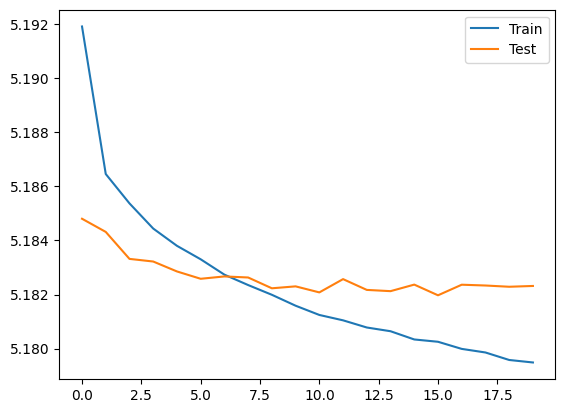

In [32]:
#Grafico de la perdida de train y test
plt.plot(train_loss, label="Train")
plt.plot (test_loss, label="Test")
plt.legend()
plt.show()



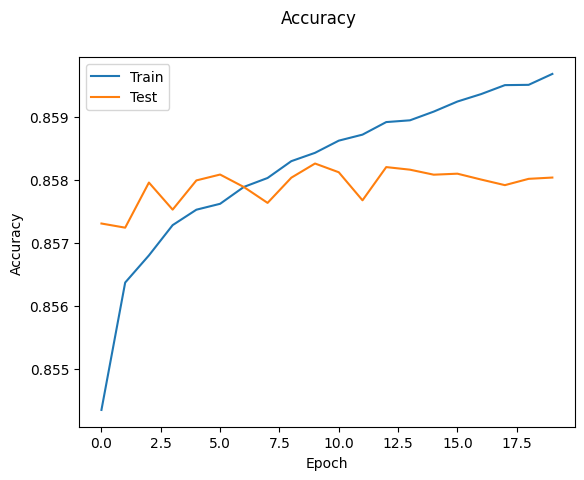

In [33]:
#Grofico el accuracy de train y test
fig = plt.figure()
fig.suptitle('Accuracy')
ax = fig.add_subplot(111)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

plt.plot(train_acc, label="Train")
plt.plot(test_acc, label="Test")
plt.legend()
plt.show()

### B) Modelo con embeddings

In [34]:
user_id_index = df.columns.get_loc("User_ID")
product_id_index = df.columns.get_loc("Product_ID")

In [35]:
X = df[columns].to_numpy()
y = df[target_columns].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
#Separo las columnas de embedding
X_embed_train = X_train[:, [user_id_index, product_id_index]]
X_embed_test = X_test[:, [user_id_index, product_id_index]]
#Elimino las columnas de embedding del resto de los datos
X_train = np.delete(X_train, [user_id_index, product_id_index], axis=1)
X_test = np.delete(X_test, [user_id_index, product_id_index], axis=1)

n_train = y_train.shape[0]
n_test = y_test.shape[0]

In [36]:
columns.__len__()

59

In [37]:
input_shape = X_train.shape
input_shape

(440054, 57)

In [38]:
X_embed_train.shape

(440054, 2)

In [39]:
y_train.shape

(440054, 4)

In [40]:
class MyDataset_embed(Dataset):

    def __init__(self, X, X_embed, y):
        super().__init__()
        self.X = X
        self.X_embed = X_embed
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
            
        return self.X[idx],self.X_embed[idx], self.y[idx]

In [41]:
train_embed = MyDataset_embed(X_train,X_embed_train, y_train)

In [42]:
test_embed = MyDataset_embed(X_test,X_embed_test, y_test)

In [43]:
train_dataloader_embed = DataLoader(train_embed, batch_size=64, shuffle=True)
test_dataloader_embed = DataLoader(test_embed, batch_size=64, shuffle=True)

### Estructura de la red con embeddings

In [44]:
class NNet_embed(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.embedding0_dim = 9 
        self.embedding1_dim = 8
        self.embedding_0 = torch.nn.Embedding(num_embeddings=6500, embedding_dim=self.embedding0_dim) 
        self.embedding_1 = torch.nn.Embedding(num_embeddings=4000, embedding_dim=self.embedding1_dim) 
        self.linear_1 = torch.nn.Linear(in_features=input_shape[1] + self.embedding0_dim + self.embedding1_dim, out_features=128, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=128, out_features=256, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=256, out_features=4, bias=True)
        self.output = torch.nn.Softmax(dim=1)
        
    def forward(self, x, x_embed): 
        x_embed_0 = self.embedding_0(x_embed[:,0])
        x_embed_1 = self.embedding_1(x_embed[:,1])
        x = torch.cat((x, x_embed_0, x_embed_1), dim=1)
        x = self.linear_1(x) 
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.linear_3(x)
        x = self.output(x)
        return x

In [45]:
nnet_embed = NNet_embed()

In [46]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nnet_embed.parameters(), lr=0.001)

In [47]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

print(device)

cpu


### Entrenamiento del modelo con embeddings

In [48]:
nnet_embed.to(device)

epochs = 20

train_loss_emb = []
test_loss_emb = []
train_acc_emb = []
test_acc_emb = []
for epoch in range(epochs):

    epoch_loss_emb = 0
    epoch_y_pred_emb = []
    epoch_y_train_emb = []
    nnet_embed.train(True)
    for i, data in enumerate(train_dataloader_embed):

        # datos del batch
        X_batch, X_embed_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        X_embed_batch = X_embed_batch.to(device).long()
        Y_batch = y_batch.to(device).float().reshape(-1)

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet_embed(X_batch,X_embed_batch).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 

        epoch_loss_emb += loss.item()
        epoch_y_pred_emb += list(y_batch_score.detach().cpu().numpy())  
        epoch_y_train_emb += list(Y_batch.detach().cpu().numpy()) 

    # Calculo de metricas del epoch

    # loss entrenamiento
    train_loss_emb.append(epoch_loss_emb/n_train)
    # accuracy entrenamiento
    acc_train_emb = metrics.accuracy_score(epoch_y_train_emb, np.round(epoch_y_pred_emb))
    train_acc_emb.append(acc_train_emb)
    prec_train_emb = metrics.precision_score(epoch_y_train_emb, np.round(epoch_y_pred_emb), average='macro')

    # inferencias en test
    epoch_loss_test_emb = 0
    epoch_y_pred_test_emb = []
    epoch_y_test_emb = []
    nnet_embed.train(False) #Deshabilito el entrenamiento
    for i, data in enumerate(test_dataloader_embed):
        X_batch, X_embed_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        X_embed_batch = X_embed_batch.to(device).long()
        Y_batch = y_batch.to(device).float().reshape(-1)
        y_batch_pred = nnet_embed(X_batch,X_embed_batch).reshape(-1)
        loss = loss_function(y_batch_pred, Y_batch)
        epoch_loss_test_emb += loss.item()
        epoch_y_pred_test_emb += list(y_batch_pred.detach().cpu().numpy())  
        epoch_y_test_emb += list(Y_batch.detach().cpu().numpy())

    # loss test
    test_loss_emb.append(epoch_loss_test_emb/n_test)
    # accuracy test
    acc_test_emb = metrics.accuracy_score(epoch_y_test_emb, np.round(epoch_y_pred_test_emb))
    test_acc_emb.append(acc_test_emb)
    prec_test_emb = metrics.precision_score(epoch_y_test_emb, np.round(epoch_y_pred_test_emb), average='macro')

    #imprimo los resultados del epoch con dos decimales
    print (f"Epoch: {epoch} | Train Loss: {epoch_loss_emb/n_train:.5f} | Train Acc: {acc_train_emb:.5f} | Train Prec: {prec_train_emb:.5f} | Test Loss: {epoch_loss_test_emb/n_test:.5f} | Test Acc: {acc_test_emb:.5f} | Test Prec: {prec_test_emb:.5f}")



Epoch: 0 | Train Loss: 5.19811 | Train Acc: 0.85142 | Train Prec: 0.80198 | Test Loss: 5.18550 | Test Acc: 0.85697 | Test Prec: 0.80939
Epoch: 1 | Train Loss: 5.18700 | Train Acc: 0.85611 | Train Prec: 0.80819 | Test Loss: 5.18476 | Test Acc: 0.85721 | Test Prec: 0.80963
Epoch: 2 | Train Loss: 5.18603 | Train Acc: 0.85647 | Train Prec: 0.80866 | Test Loss: 5.18380 | Test Acc: 0.85781 | Test Prec: 0.81046
Epoch: 3 | Train Loss: 5.18513 | Train Acc: 0.85673 | Train Prec: 0.80901 | Test Loss: 5.18315 | Test Acc: 0.85789 | Test Prec: 0.81058
Epoch: 4 | Train Loss: 5.18424 | Train Acc: 0.85726 | Train Prec: 0.80973 | Test Loss: 5.18319 | Test Acc: 0.85767 | Test Prec: 0.81027
Epoch: 5 | Train Loss: 5.18361 | Train Acc: 0.85762 | Train Prec: 0.81021 | Test Loss: 5.18272 | Test Acc: 0.85788 | Test Prec: 0.81058
Epoch: 6 | Train Loss: 5.18306 | Train Acc: 0.85796 | Train Prec: 0.81069 | Test Loss: 5.18227 | Test Acc: 0.85813 | Test Prec: 0.81091
Epoch: 7 | Train Loss: 5.18250 | Train Acc: 0.85

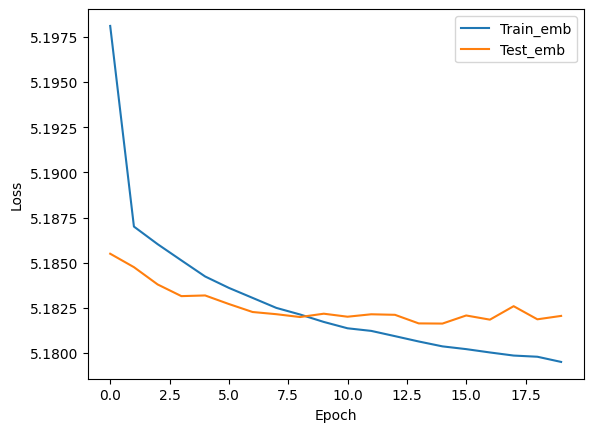

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

plt.plot(train_loss_emb, label="Train_emb")
plt.plot (test_loss_emb, label="Test_emb")
plt.legend()
plt.show()


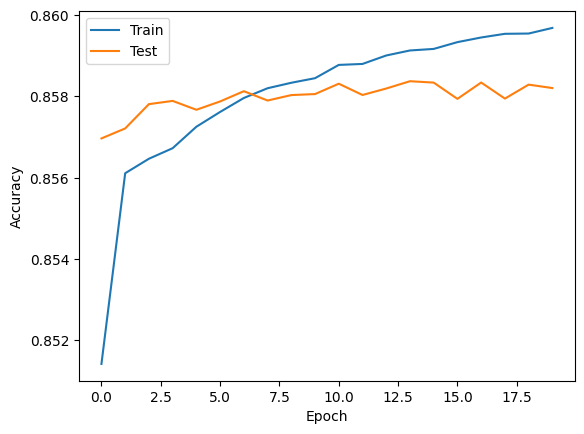

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

plt.plot(train_acc_emb, label="Train")
plt.plot(test_acc_emb, label="Test")
plt.legend()
plt.show()

### C) Comparacion de modelos

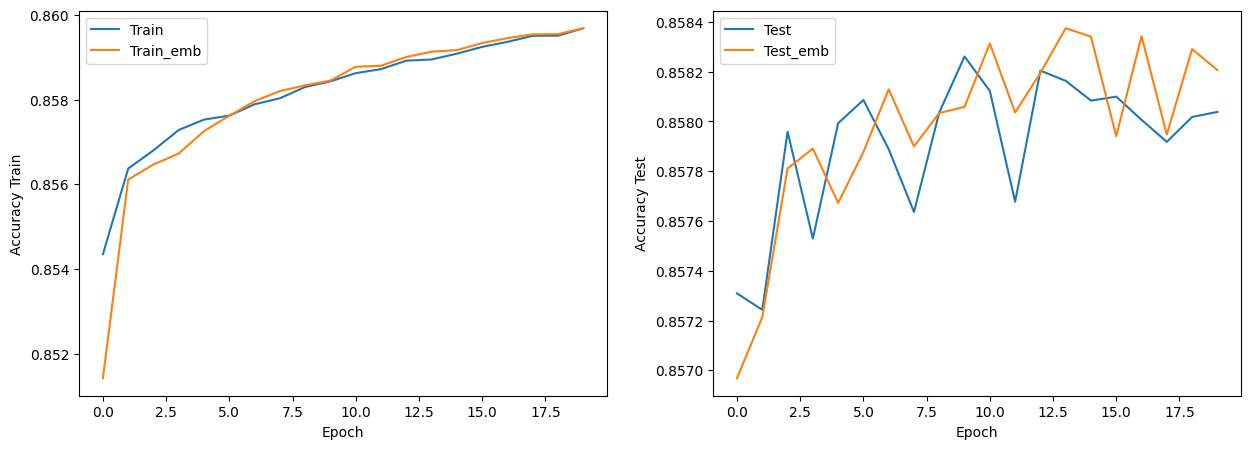

In [51]:
#Armo dos graficos para comparar los resultados de la red con y sin embeddings. Uno para train y otro para test
fig = plt.figure()
ax = fig.subplots(1,2)
fig.set_size_inches(15, 5)

ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Train')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy Test')
#grafico de train
ax[0].plot(train_acc, label="Train")
ax[0].plot(train_acc_emb, label="Train_emb")
ax[0].legend()
#grafico de test
ax[1].plot(test_acc, label="Test")
ax[1].plot(test_acc_emb, label="Test_emb")
ax[1].legend()
plt.show()



Se puede ver que ambos modelos tienen una performance similar. Los dos alcanzan rapidamente un accuracy superior a 0.85 y se estabilizan alli sin mejoras sustanciales en los distintos epochs.\
Teniendo en cuenta que los modelos tienen rendimientos muy similates no se justifica el uso de embeddings en este caso.